## Case Prompt

Currently, NFP has set a target of _25 clients per full-time nurse home visitor_.

**Does careful analysis of data support this as a uniform target and one that best fosters an
efficient and effective level of operations?** And, if not, what standard or standards
would be more appropriate, and under what conditions?

While there are a variety of effectiveness measures available, we encourage participants to
focus on the following outcome metrics for this challenge:

- Low incidence of preterm births (preterm)
- High rates of initiation of breastfeeding (initiated_bf)
- Enrollment or completion of high school (for clients 18 years old or younger) (changeineducation)
- Employment (for clients 19 years or older) (changeinemployment)
- High rate of client retention across pregnancy 

There are also many possible factors of influence available to participants. These include,
but are not limited to, client needs, client risks, nurse turnover, tenure, case mix, and
geographic variation (urban vs rural or state-specific).

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

### NFP Nurse Info
This dataset provides information about each nurse listed as visiting or being assigned to active clients in the active client list.

It provides nurse FTE information for each nurse by month. Typically, a nurse with 0.5 FTE would be expected to carry a caseload that is half of the caseload of a full-time nurse (FTE=1.0).

Nurse ID variable can be linked to active client dataset (**nurse_id** or **nurse_id_assigned**).

Some nurses could be missing a value for their FTE, students can either impute their FTE value (based on their number of clients each month) or drop these nurses from the analysis. 

| Variable | Description | Format | Values |
|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|------------------------------------------------------------------------------------------------------------------------------------|
| nurse_id | Nurse ID. This identifier can be joined to nurse_id in the active client dataset or nurse_id_assigned in the active client dataset. | numeric |  |
| month | Month of study period. | numeric |  |
| site_id | Agency of employment. Can be joined to site_id in the agency dataset or active client dataset. | numeric |  |
| first_visit_dt | Date of agency hire or first home visit | date |  |
| fte | Nurse Home Visitor full-time equivalent (FTE) -- this is the full-time equivalents specifically assigned to staff member for the nurse home visiting role. This value could be missing for a specific nurse. Students could choose to impute a nurses fte (based on their average number of clients each month) or they can drop these nurses from the analysis. | numeric |  |
| term_flag | Flag if Nurse Home Visitor left the agency during the study period | numeric | 1= Yes, nurse was terminated during study period; "NULL" or "Missing" = the nurse did not leave the agency during the study period |
| nurse_primary_role | Nurse primary role as of during month. Note -- It is possible that nurse supervisors see clients and maintain a caseload, which is why you might see visits performed by nurse supervisors. Other roles such as data manager, program administrator, etc are likely a result of an administrative error. These nurses and their associated clients can be dropped from the analysis if students choose that approach. | character |  |
| numcases_actual | Number of clients the nurse visited during the particular month (based on the 'nurse_id' tag in the active_clients dataset. This field can be divided by the 'fte' field to get a measure of actual caseload per FTE | numeric |  |
| numcases_assigned | Number of cases that the nurse was assigned during the particular month (based on the 'nurse_id_assigned' tag in the active_clients dataset. This field can be divided by the 'fte' field to get a measure of the assigned caseload per FTE | numeric |  |

In [2]:
nfp_nurse_info = pd.read_csv("data/NFP_NURSE_INFO_TRAIN.csv")

In [56]:
nfp_nurse_info.head()

,nurse_id,month,site_id,first_visit_dt,fte,term_flag,nurse_primary_role,numcases_actual,numcases_assigned
0,6165,1,109,30-May-06,1.0,NaN,Nurse Home Visitor,24.0,24.0
1,6165,2,109,30-May-06,1.0,NaN,Nurse Home Visitor,25.0,25.0
2,6165,3,109,30-May-06,1.0,NaN,Nurse Home Visitor,24.0,24.0
3,6165,4,109,30-May-06,1.0,NaN,Nurse Home Visitor,25.0,25.0
4,6165,5,109,30-May-06,1.0,NaN,Nurse Home Visitor,26.0,25.0


In [21]:
nurse_id_count = nfp_nurse_info[['nurse_id', 'site_id']].groupby(['site_id']).agg(['count'])

In [5]:
nfp_agency = pd.read_csv("data/NFP_AGENCY_TRAIN.csv")

In [62]:
nurse_id_count.index.names = ['site_id']

In [94]:
nfp_agency.sort_values(by='state').head()

,state,site_id,referral_count,conversion_rate,percent_retained_preg,percent_retained_1yr,percent_retained_2yr,first_hv,pct_urban,num_clients,nc_score,s_meetings
192,AK,355,216.0,47.69,87.50,62.35,45.59,8-Feb-13,95.88,511,Medium,261.0
157,AK,308,NaN,NaN,89.87,47.67,33.33,6-Jun-12,95.88,624,Low,192.0
2,AL,95,109.0,47.71,90.00,58.82,41.30,29-Dec-08,89.51,565,Medium,216.0
158,AL,311,153.0,16.34,90.00,75.00,66.67,14-Jun-12,74.49,217,Medium,129.0
144,AR,288,413.0,37.29,83.21,41.86,21.18,29-Sep-11,48.45,1055,Medium,289.0


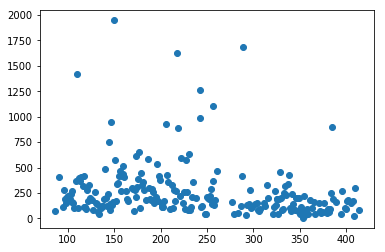

In [66]:
%matplotlib inline
plt.scatter(x=nfp_agency['site_id'], y=nfp_agency['referral_count'])

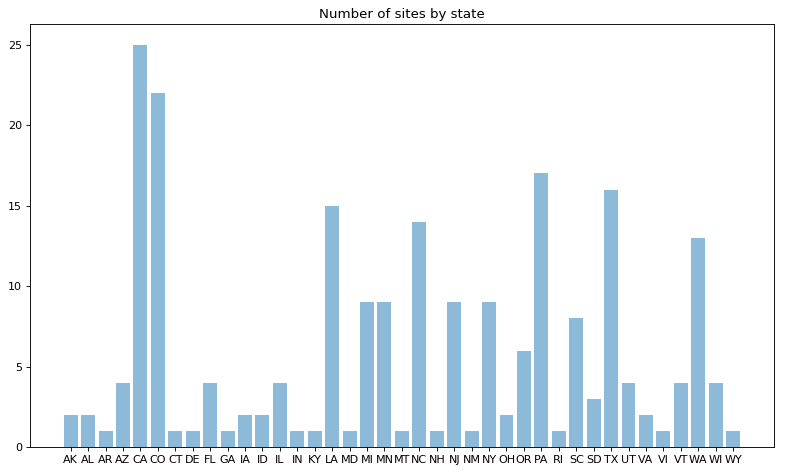

In [97]:
import numpy as np
fig=plt.figure(figsize=(12, 7), dpi= 80, facecolor='w', edgecolor='k')

count_by_state = nfp_agency[['site_id', 'state']].groupby(['state']).agg({'site_id': 'count'})
y_pos = np.arange(len(count_by_state))
plt.bar(y_pos, count_by_state['site_id'], align='center', alpha=0.5)
plt.xticks(y_pos, count_by_state.index)
plt.title('Number of sites by state')

plt.show()

In [8]:
active_client = pd.read_csv("data/ACTIVE_CLIENTS_TRAIN.csv")

In [9]:
active_client[active_client.casenumber == 'CS_47822000']

,study_id,casenumber,month,site_id,time_in_program,visit_count,program_phase,days_last_visit,nurse_id,nurse_id_assigned
0,47821000,CS_47822000,1,109,422,2,Toddlerhood,10,6165,6165
44,47821000,CS_47822000,2,109,452,0,Toddlerhood,40,6165,6165
57,47821000,CS_47822000,3,109,483,1,Toddlerhood,20,6165,6165
94,47821000,CS_47822000,4,109,514,1,Toddlerhood,9,6165,6165
117,47821000,CS_47822000,5,109,543,0,Toddlerhood,38,6165,6165
144,47821000,CS_47822000,6,109,574,1,Toddlerhood,24,6165,6165
172,47821000,CS_47822000,7,109,604,1,Toddlerhood,23,6165,6165
174,47821000,CS_47822000,8,109,635,1,Toddlerhood,26,6165,6165
215,47821000,CS_47822000,9,109,665,1,Toddlerhood,28,6165,6165
237,47821000,CS_47822000,10,109,696,1,Toddlerhood,17,6165,6165


In [10]:
client_demographics = pd.read_csv("data/CLIENT_DEMOGRAPHICS_TRAIN.csv")

In [11]:
client_demographics.head()

,study_id,casenumber,reasonfordismissal,length_of_stay,visit_count,transfer,gestation_at_enrollment,enrolled_after_birth,still_enrolled,client_age,...,indian_health_any,wic_any,ccap_any,tanf_any,ssi_any,special_needs_any,early_intervention_child_any,foodstamp_any,asq_referral,asq_at_least_once
0,17499000,CS_17500000,Child reached 2nd birthday,960,45,0,18.428571,0.0,0,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1259000,CS_1260000,Agency Closure,126,8,0,11.000000,0.0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,10913000,CS_10914000,Child reached 2nd birthday,932,31,0,22.714286,0.0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,30767000,CS_30768000,Child reached 2nd birthday,955,55,0,NaN,0.0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,31520000,CS_31521000,Unable to locate,543,23,0,22.142857,0.0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
